1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

y = 2.62x + 444.18


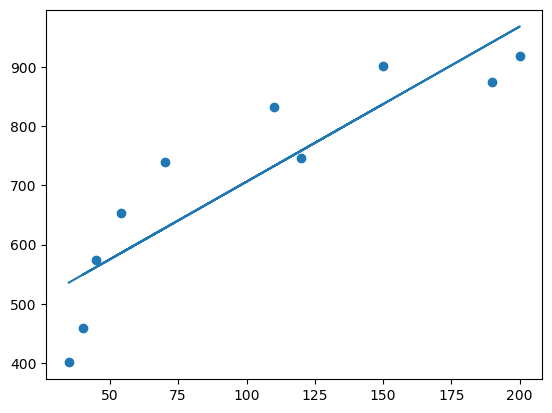

In [14]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
Y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

# y = b1 * x + b0, x - влияющий параметр
b1 = (np.mean(X * Y) - np.mean(Y) * np.mean(X)) / (np.mean(X ** 2) - np.mean(X) ** 2)
b0 = np.mean(Y) - b1 * np.mean(X)

print(f'y = {b1:.2f}x + {b0:.2f}')
plt.scatter(X, Y)
plt.plot(X, b1 * X + b0)


2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

y = 5.89x


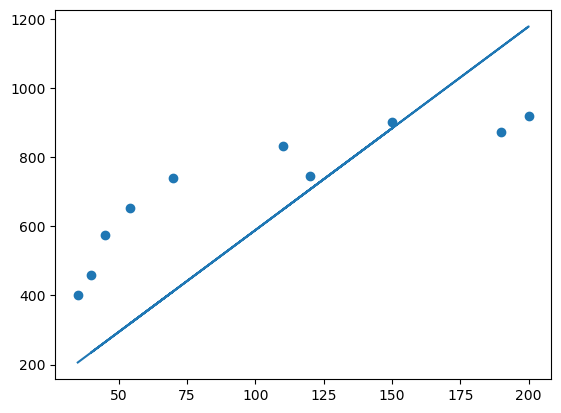

In [13]:
def mse_(B1, y = Y, x = X, n = 10):
    return np.sum((B1*x - y) ** 2) / n

alpha = 1e-6

B1 = 3

n = len(X)

for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1 * X - Y) * X)

print(f'y = {B1:.2f}x')
plt.scatter(X, Y)
plt.plot(X, B1 * X)
                                

3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

y = 2.93x + 402.18


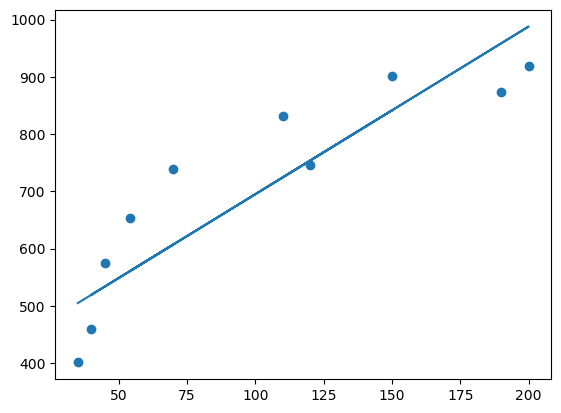

In [23]:
def mse_(B0, B1, y = Y, x = X, n = 10):
    return np.sum((B0 + B1*x - y) ** 2) / n

alpha = 1e-5

B0 = 400
B1 = 3

n = len(X)

for i in range(10000):
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * X - Y) * X)
    B0 -= alpha * (2/n) * np.sum(B0 + B1 * X - Y)

print(f'y = {B1:.2f}x + {B0:.2f}')
plt.scatter(X, Y)
plt.plot(X, B1 * X + B0)